In [191]:

library(ggplot2)
library(tidyverse)
library(data.table)

library(repr)
options(repr.plot.width=6, repr.plot.height=4)
#options(repr.plot.width=4, repr.plot.height=3)



In [90]:
years<-c('1980','1990','2000','2010')
id <- 1:4
temper <-c(rep('cold',2),rep('hot',2))
popul <-c(100000,150000,250000,170000)
df<-data.table(years,id,temper,popul)
df

years,id,temper,popul
1980,1,cold,100000
1990,2,cold,150000
2000,3,hot,250000
2010,4,hot,170000


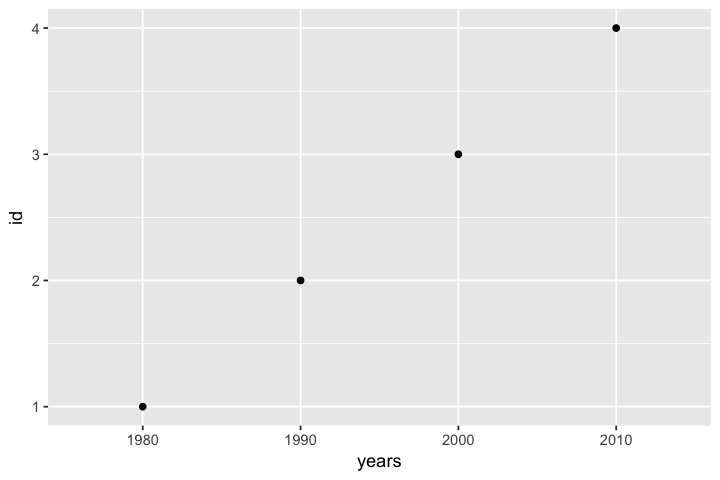

In [91]:
#simple scatter on two df variables
p<-ggplot(data=df, mapping=aes(x=years,y=id) ) +
 geom_point()
print(p)

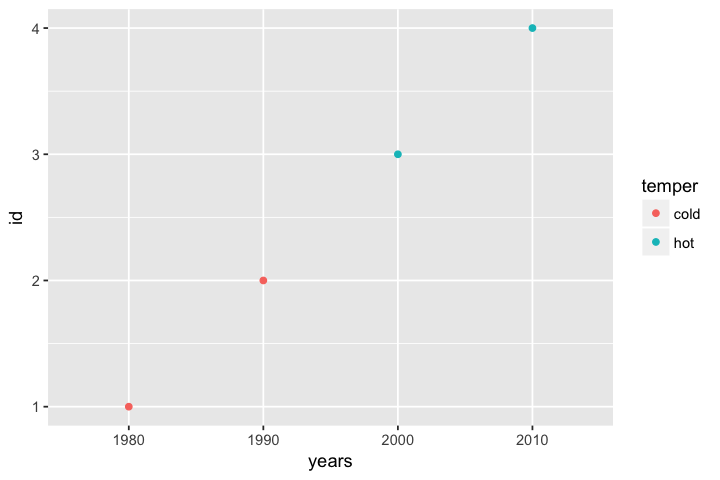

In [92]:
#with mapping
p<-ggplot(data=df, mapping=aes(x=years,y=id) ) +
 geom_point(mapping=aes(color=temper))
print(p)

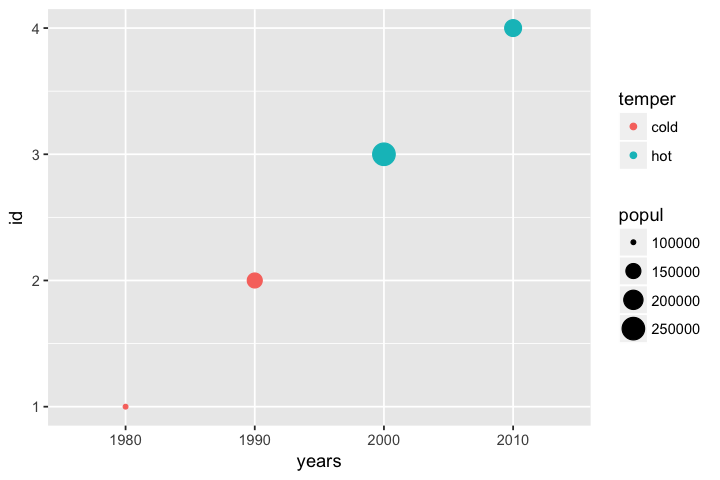

In [93]:
#scatter with size varing
p<-ggplot(data=df, mapping=aes(x=years,y=id, size=popul) ) +
 geom_point(mapping=aes(color=temper))
print(p)

In [105]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


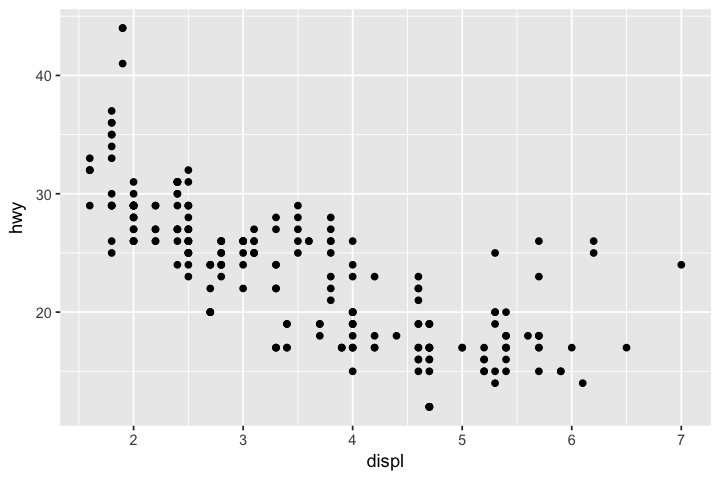

In [95]:
#scatter with more points
p<-ggplot(data=mpg) +
     geom_point(mapping=aes(x=displ,y=hwy))
print(p)

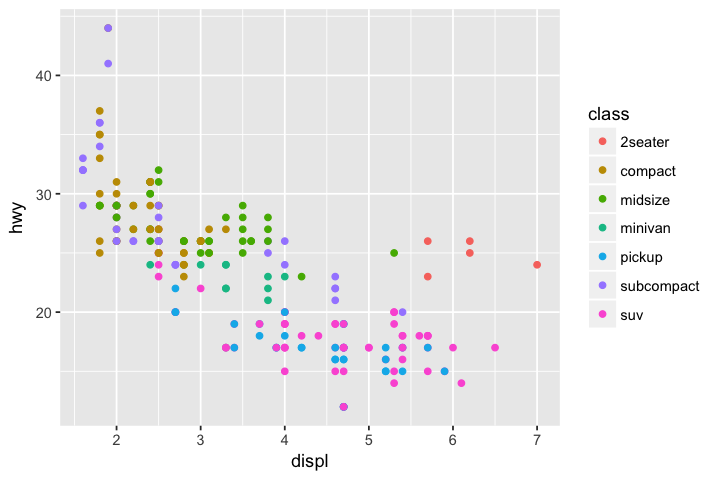

In [96]:
#scatter with 3rd var as a class
p<-ggplot(data=mpg) +
     geom_point(mapping=aes(x=displ,y=hwy,color=class))
print(p)

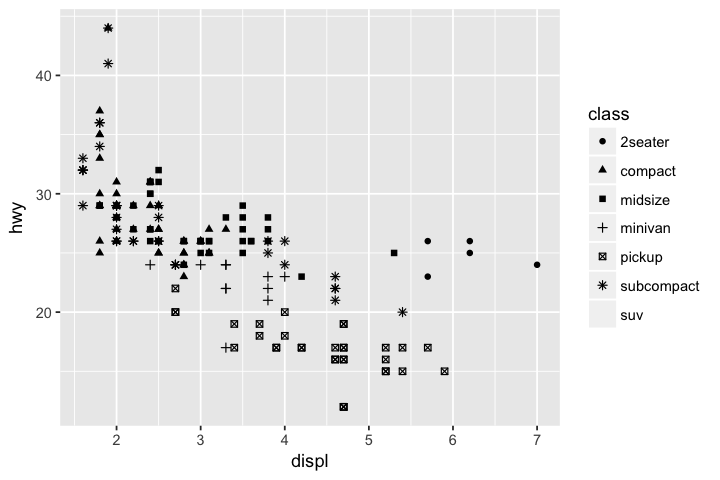

In [118]:
#scatter with 3rd var as a shape
p<-ggplot(data=mpg) +
     geom_point(mapping=aes(x=displ,y=hwy,shape=class))
suppressWarnings(print(p))

Warning message:
“Using size for a discrete variable is not advised.”

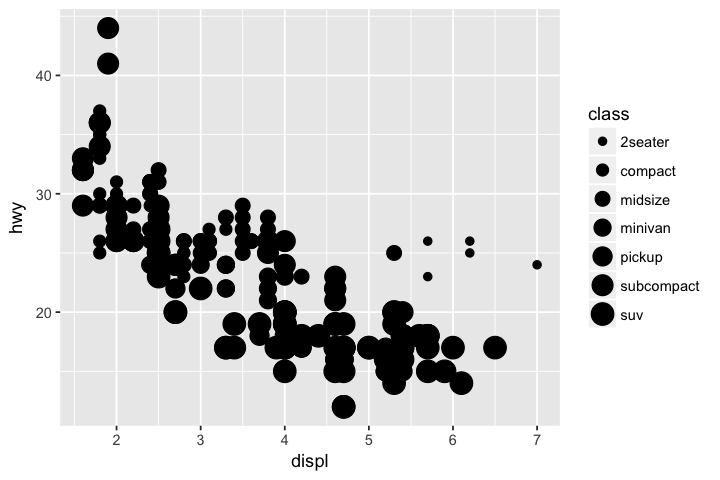

In [98]:
#scatter with 3rd var as a size
p<-ggplot(data=mpg) +
     geom_point(mapping=aes(x=displ,y=hwy,size=class))
print(p)

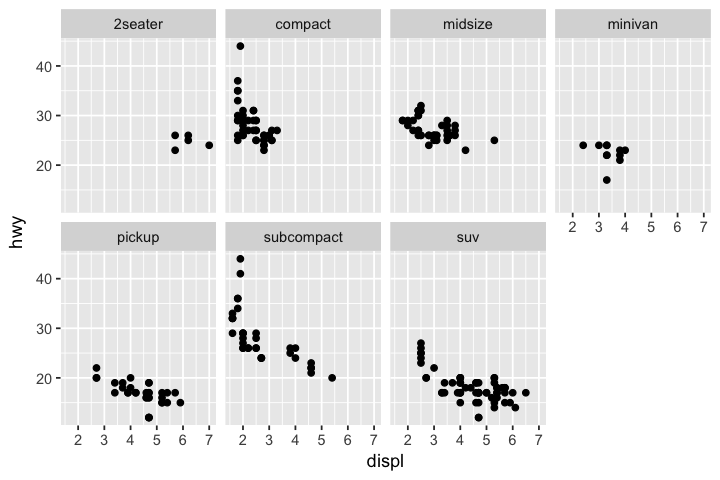

In [99]:
#scatter with 3rd var as a facert
p<-ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~ class,nrow=2) 
print(p)

`geom_smooth()` using method = 'loess'


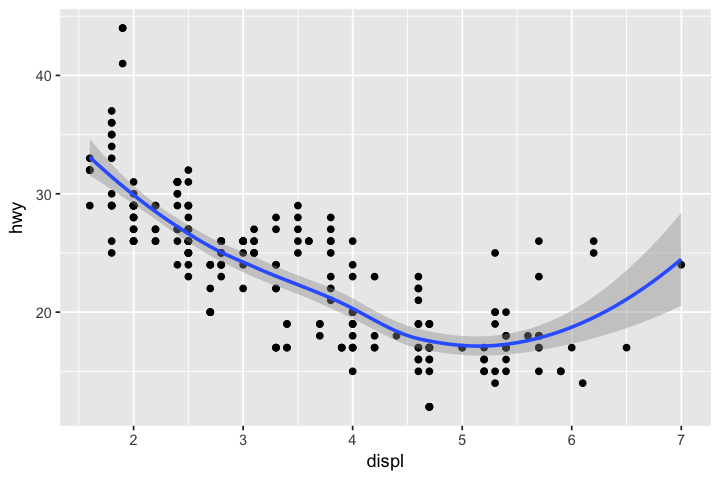

In [101]:
#scatter with a polynomial (uses loess)
p<-ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    geom_smooth(mapping = aes(x=displ,y=hwy))
print(p)

`geom_smooth()` using method = 'loess'


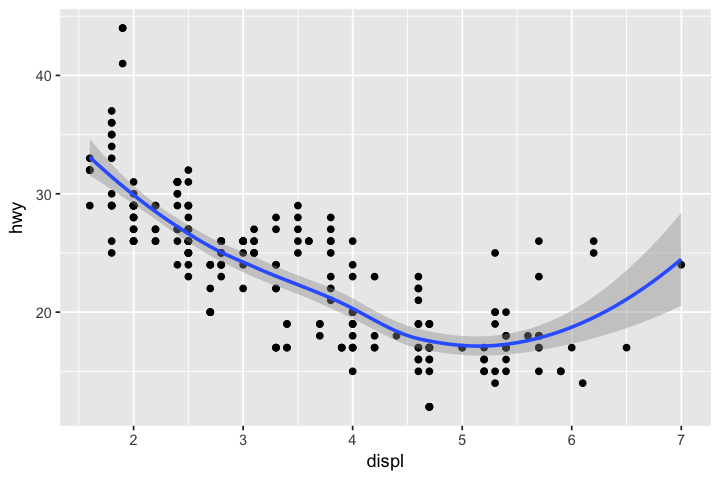

In [109]:
#scatter with smoth with global mappings
p<-ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) +
    geom_point() +
    geom_smooth()
print(p)

`geom_smooth()` using method = 'loess'


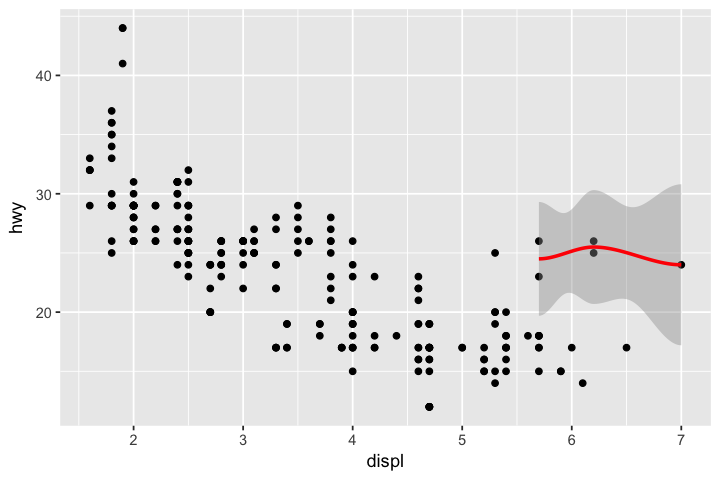

In [117]:
#scatter with smooth when local overrides global
mpgdt<-data.table(mpg)
p<-ggplot(data=mpgdt, mapping=aes(x=displ,y=hwy)) +
    geom_point() +
    geom_smooth(data=mpgdt[class=="2seater",],
                color="red")
    #only a subset of data is used for smoothing
suppressWarnings(print(p))

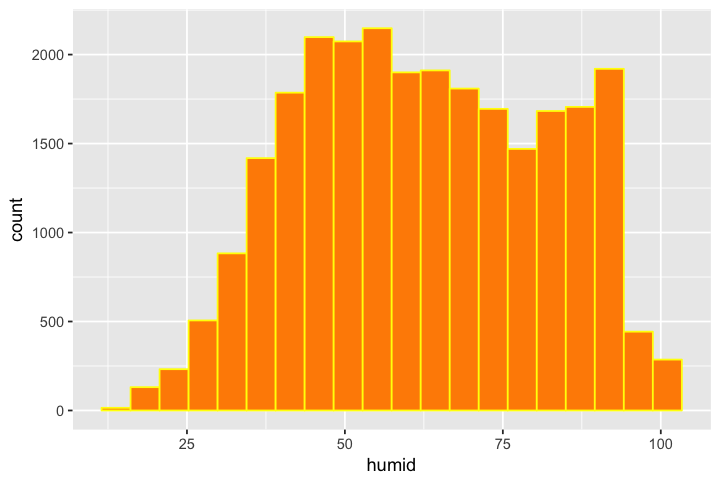

In [130]:
#histogram
library(nycflights13)
p<- ggplot(data=weather, mapping=aes(x=humid)) +
    geom_histogram(bins=20,color="yellow",
                   fill="darkorange") 
suppressWarnings(print(p))

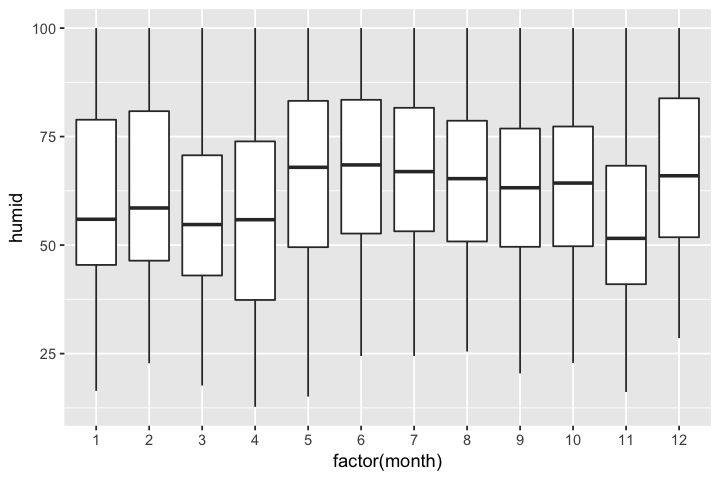

In [140]:
#boxplot  a boxplot of humid for distinct values of month
p<- ggplot(data=weather, mapping=aes(x=factor(month), y=humid)) +
    geom_boxplot() 
suppressWarnings(print(p))

year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period_code,decade_code
2013,tt1711425,21 & Over,notalk,notalk,FAIL,13000000,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1


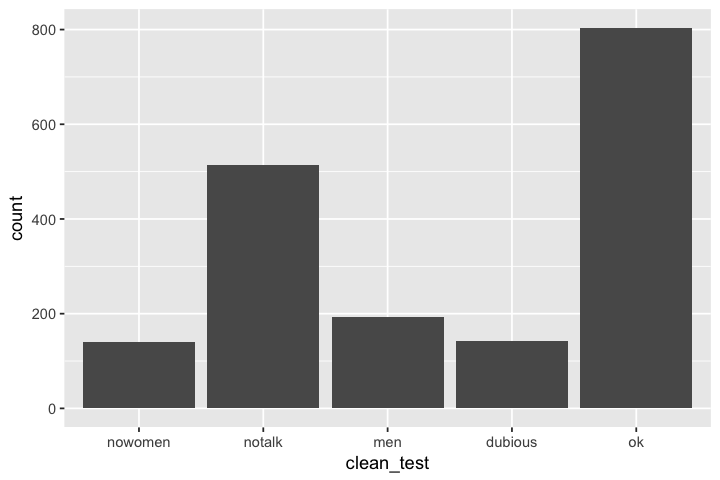

In [146]:
##bar chart
library(fivethirtyeight)
head(bechdel,2)  #imdb stats
#dim(bechdel)

p<- ggplot(data=bechdel, mapping=aes(x=clean_test)) +
    geom_bar() 
print(p)


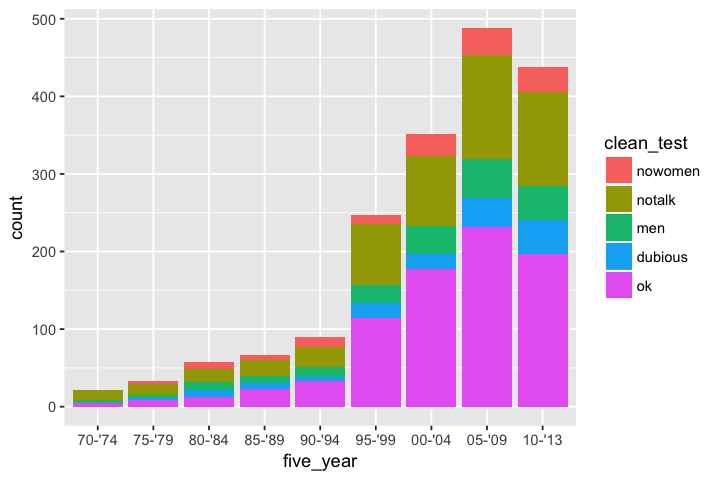

In [153]:
##over time barchart with a time variable put in baskets
# categorize year variable into bins
year_bins<-c("70-'74","75-'79","80-'84","85-'89",
             "90-'94","95-'99","00-'04","05-'09",
             "10-'13")
bechdel <- bechdel %>%
    mutate(five_year = cut(year,
                           breaks=seq(1969,2014,5),
                           labels=year_bins))


p<- ggplot(data=bechdel,
           mapping=aes(x=five_year,fill = clean_test)) +
    geom_bar() 
print(p)



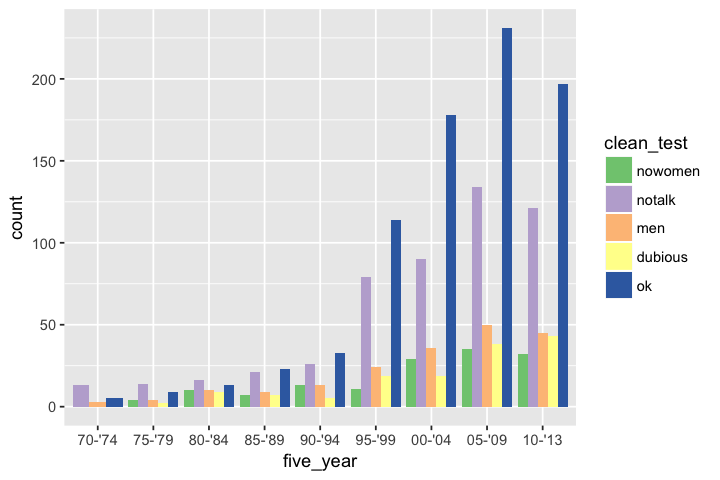

In [155]:
#over time chrt side by side
p<- ggplot(data=bechdel,
           mapping=aes(x=five_year,fill = clean_test)) +
    geom_bar(position="dodge") +
    scale_fill_brewer(type="qual") #special color palette
print(p)



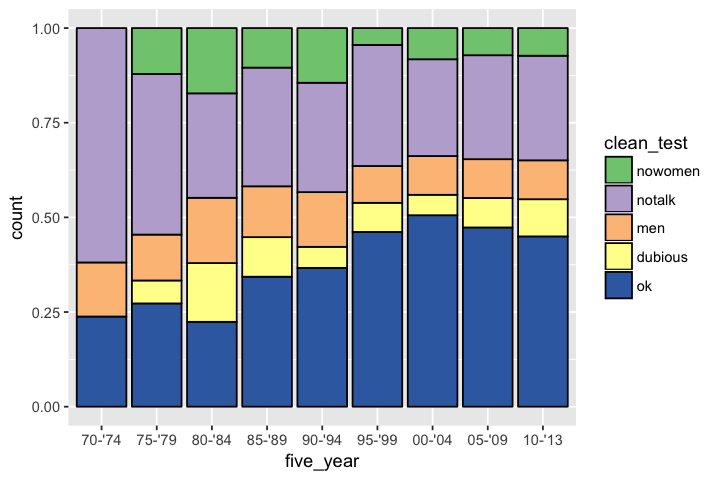

In [156]:
# over time stack proportional
p<- ggplot(data=bechdel,
           mapping=aes(x=five_year,fill = clean_test)) +
    geom_bar(position="fill",color="black") +
    scale_fill_brewer(type="qual") 
print(p)


In [166]:
##exploratory data analysis
library(tidyverse)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [173]:
dt<-data.table(diamonds)
dim(dt)
smaller<-dt[carat < 3,]
dim(smaller)

[1] 53940    10

[1] 53900    10

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.710   5.700   5.731   6.540  10.740 

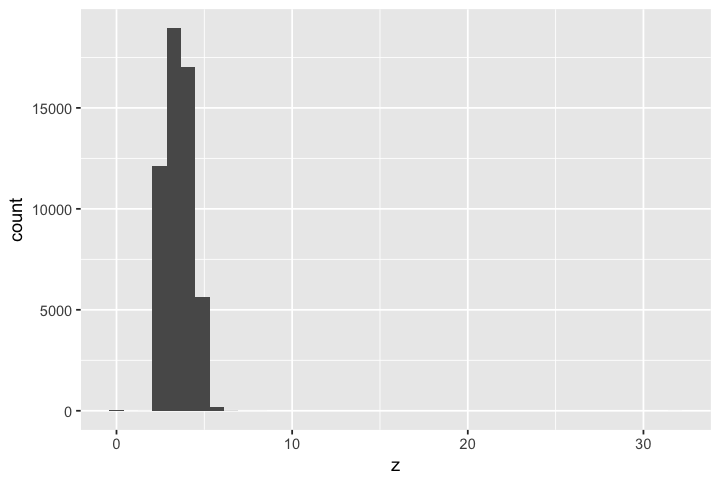

In [177]:
p<- ggplot(data=diamonds, mapping=aes(x=z)) +
    geom_histogram(bins=40) 
print(p)

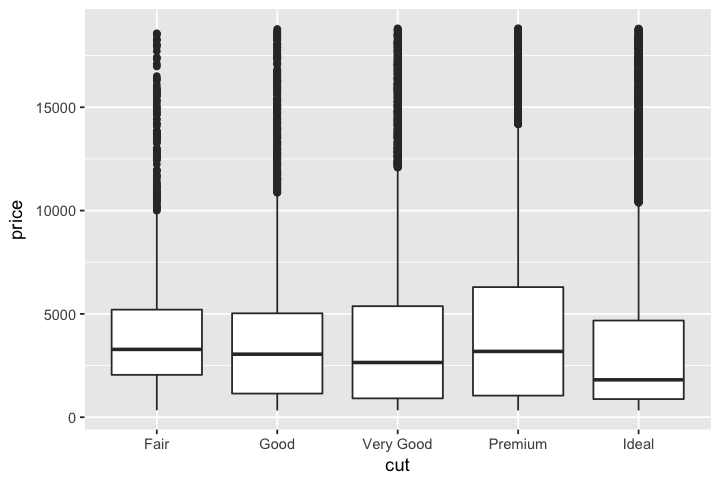

In [179]:
p<- ggplot(data=diamonds, mapping=aes(x=factor(cut), y=price)) +
    geom_boxplot() +
    labs(x="cut")
print(p)

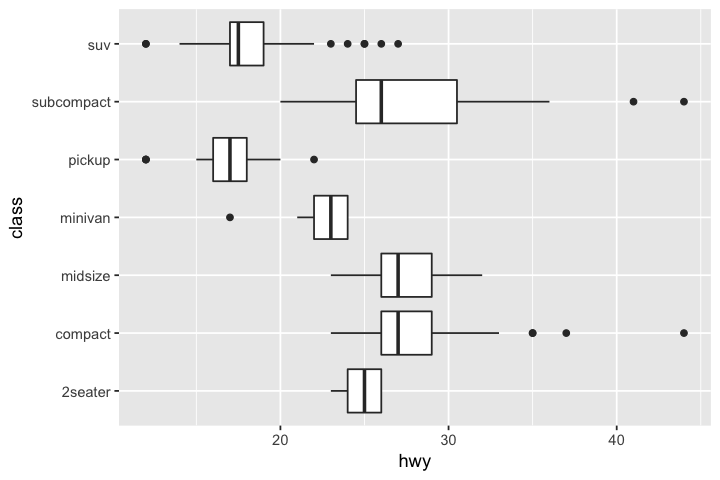

In [190]:
p<-ggplot(data=mpg,aes(class,hwy)) +
    geom_boxplot() +
    coord_flip()
print(p)

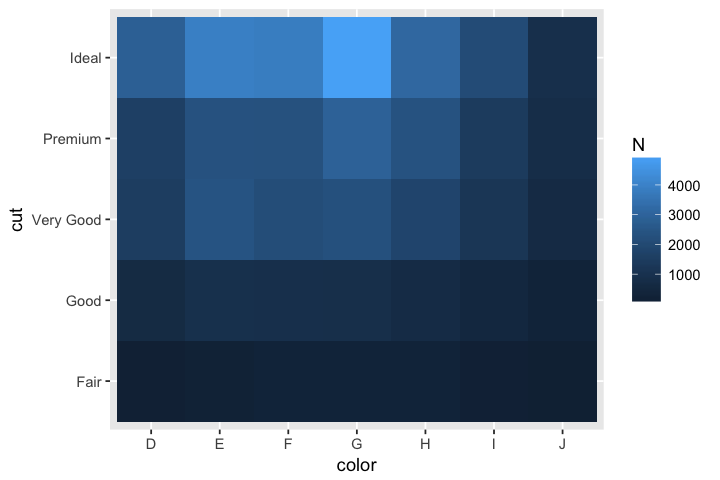

In [183]:
#contour plot show counts for two categorical variables
p<-ggplot(data=dt[,.N,by=.(color,cut)], mapping=aes(color,cut))+
geom_tile(mapping=aes(fill=N))
print(p)

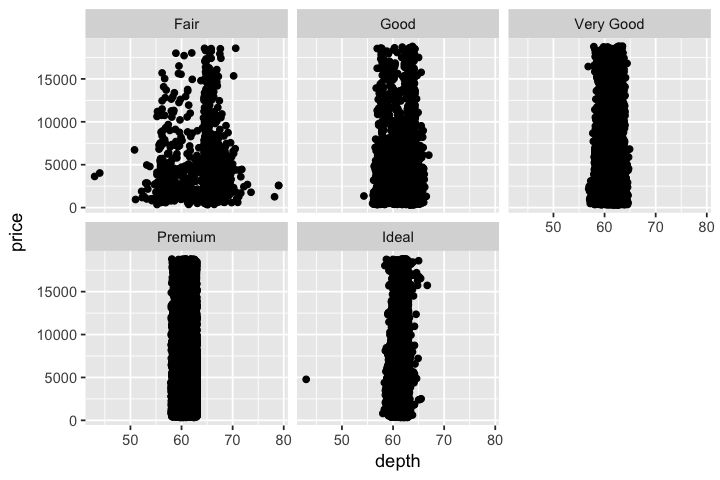

In [185]:
#scatter for 2 continuous vars + facet on factor variable
#scatter with more points
p<-ggplot(data=dt) +
     geom_point(mapping=aes(x=depth,y=price)) +
    facet_wrap(~ cut,nrow=2) 
print(p)